# American Sign Language (ASL) Classifier using CNN
Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

np.random.seed(1)
tf.random.set_seed(2)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Helper Functions

In [2]:
def load_data(train_path,test_path,train_size):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)

    split = int(train_size*train.shape[0])

    X_train = train.drop('label',axis=1)[:split].to_numpy().reshape(split,28,28).astype('float32')/255
    y_train = train['label'][:split]

    X_val = train.drop('label',axis=1)[split:].to_numpy().reshape(train.shape[0]-split,28,28).astype('float32')/255
    y_val = train['label'][split:]

    X_test = test.drop('label',axis=1).to_numpy().reshape(7172,28,28).astype('float32')/255
    y_test = test['label']

    return X_train, y_train, X_val, y_val ,X_test, y_test

def to_char(num):
    return chr(num+65)

def one_hot_encode(data,num_classes):
    return keras.utils.to_categorical(data,num_classes)

def test(path):
    img_path = path
    img = image.load_img(img_path, target_size=(28,28,1),grayscale=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = x/255.0
    plt.imshow(img,cmap='gray')
    prediction = model.predict(x,verbose=0)
    plt.title("Letter: "+to_char(np.argmax(prediction)));

In [3]:
train_path = '/content/drive/MyDrive/Projects/Sign_Language_Classifier/data/sign_mnist_train.csv'
test_path = '/content/drive/MyDrive/Projects/Sign_Language_Classifier/data/sign_mnist_test.csv'

X_train, y_train, X_val, y_val, X_test, y_test = load_data(train_path,test_path,0.7)
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X validation shape: ',X_val.shape)
print('y validation shape: ',y_val.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (19218, 28, 28)
y train shape:  (19218,)
X validation shape:  (8237, 28, 28)
y validation shape:  (8237,)
X test shape:  (7172, 28, 28)
y test shape:  (7172,)


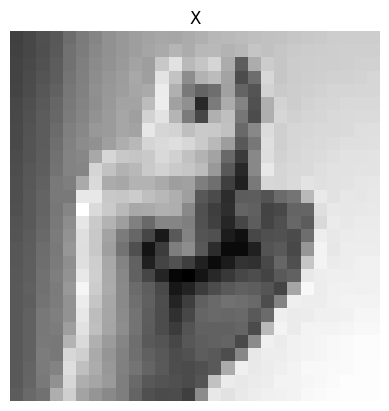

In [4]:
rand_num = random.randint(0,24)
plt.imshow(X_train[rand_num],cmap='gray')
plt.title(to_char(y_train[rand_num]))
plt.axis('off');

In [5]:
num_classes = 25
y_train = one_hot_encode(y_train,num_classes)
y_val = one_hot_encode(y_val,num_classes)
y_test = one_hot_encode(y_test,num_classes)

In [6]:
y_train[rand_num]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Model
The model is simple sequential model. The layers are:
Conv2D×2 → MaxPool → Conv2D×2 → MaxPool → Dense(512) → Dense(25)

In [7]:
model = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)),
    Activation('relu'),
    Conv2D(32,(3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                        

In [9]:
opt = keras.optimizers.legacy.RMSprop(lr=0.00005, decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train, batch_size=32, epochs=15, validation_data=(X_val,y_val),shuffle=True)

Epoch 1/15
601/601 [==============================] - 11s 8ms/step - loss: 3.1474 - accuracy: 0.0706 - val_loss: 3.0316 - val_accuracy: 0.2121
Epoch 2/15
601/601 [==============================] - 3s 6ms/step - loss: 2.7259 - accuracy: 0.2094 - val_loss: 2.1880 - val_accuracy: 0.5093
Epoch 3/15
601/601 [==============================] - 4s 6ms/step - loss: 1.9856 - accuracy: 0.3947 - val_loss: 1.4748 - val_accuracy: 0.6391
Epoch 4/15
601/601 [==============================] - 4s 7ms/step - loss: 1.4891 - accuracy: 0.5424 - val_loss: 1.0352 - val_accuracy: 0.7237
Epoch 5/15
601/601 [==============================] - 3s 6ms/step - loss: 1.1440 - accuracy: 0.6396 - val_loss: 0.7608 - val_accuracy: 0.8098
Epoch 6/15
601/601 [==============================] - 3s 6ms/step - loss: 0.9035 - accuracy: 0.7144 - val_loss: 0.5498 - val_accuracy: 0.8700
Epoch 7/15
601/601 [==============================] - 5s 8ms/step - loss: 0.7295 - accuracy: 0.7652 - val_loss: 0.4216 - val_accuracy: 0.9026
Epoch

In [11]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.2332136183977127
Test accuracy: 0.9141104221343994


In [12]:
model.save('ASLClassifier.h5')

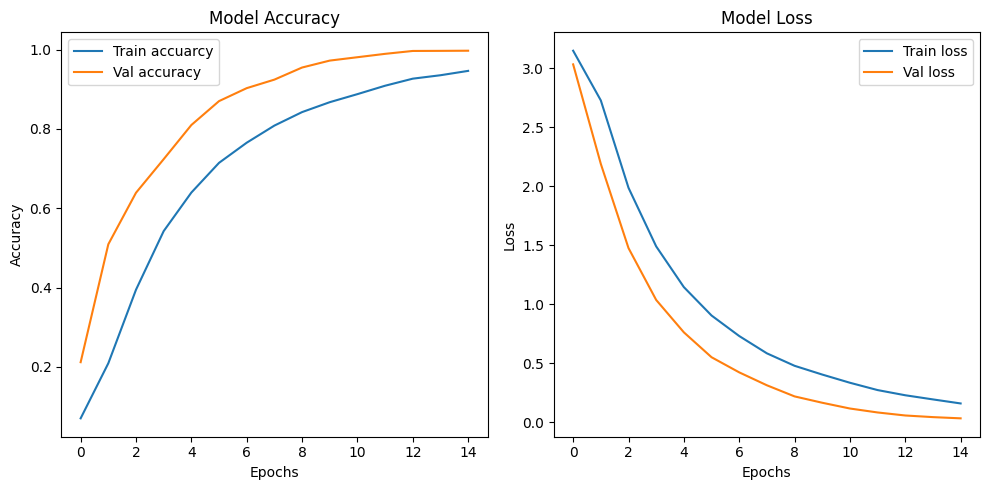

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train accuarcy','Val accuracy'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','Val loss'])
plt.tight_layout()

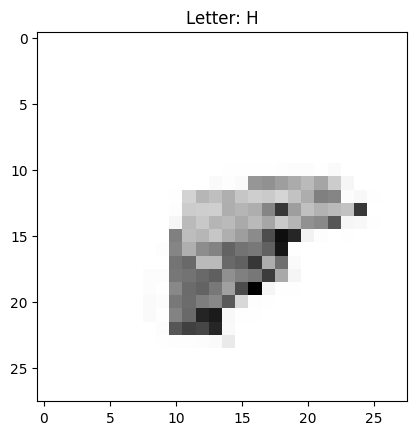

In [14]:
test("/content/H.jpg")

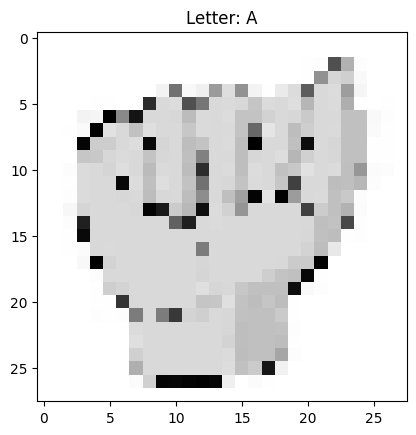

In [15]:
test('/content/A.jpg')